In [9]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [10]:
import prince
import pandas as pd

### Import the HR data set 

In [11]:
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/hr_dataset.csv'
df = pd.read_csv(data_url)

### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    int64  
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

In [13]:
df['str_zip'] = df.Zip.astype(str)
df.drop('Zip', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Sex                310 non-null    object 
 4   MaritalDesc        310 non-null    object 
 5   CitizenDesc        310 non-null    object 
 6   Hispanic/Latino    310 non-null    object 
 7   RaceDesc           310 non-null    object 
 8   Days Employed      310 non-null    int64  
 9   Reason For Term    310 non-null    object 
 10  Employment Status  310 non-null    object 
 11  Department         310 non-null    object 
 12  Position           310 non-null    object 
 13  Manager Name       310 non-null    object 
 14  Employee Source    310 non-null    object 
 15  Performance Score  310 non-null    object 
 16  str_zip            310 non

### Pull out the categorical variables and note the dimensions of the data set.

In [15]:
category = df.select_dtypes(include=['O'])
category.head()

,State,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score,str_zip
0,MA,Female,Married,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets,1450
1,MA,Male,Divorced,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets,1460
2,MA,Male,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets,2703
3,MA,Female,Married,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review,2170
4,MA,Female,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review,2330


### Reduce these categorical features down to two dimensions using MCA.

In [16]:
mca = prince.MCA(n_components=2)
mca.fit(category)
coordinates = mca.transform(category)
coordinates

,0,1
0,0.078557,0.157728
1,0.305583,0.177520
2,0.124783,0.281751
3,0.032401,0.075463
4,0.266769,0.070663
...,...,...
305,-0.009771,1.950963
306,-0.040743,1.606942
307,-0.010052,1.542056
308,-0.031799,1.732192


### Plot the coordinates of each resulting dimension.

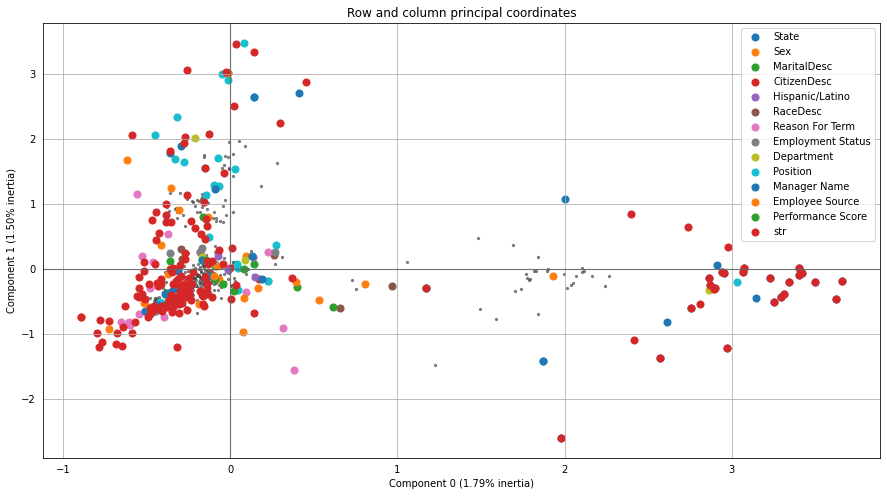

In [17]:
import matplotlib.pyplot as plt
mca.plot_coordinates(
    X=category,
    ax=None,
    figsize=(15,8),
    row_points_size=5,
    show_row_points=True,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=50,
    show_column_labels=False,
)
plt.show()

### One hot encode the categorical features and note the change in dimensions in the data set.

### Reduce the one hot encoded categorical features down to two dimensions using CA.

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit_transform(category)
category_ = encoder.toarray()
ca = prince.CA()
ca.fit(category_)
coordinates = ca.transform(category_)
coordinates

,0,1
0,-0.005179,0.083817
1,0.359451,0.157548
2,0.022931,0.221746
3,-0.008763,-0.006269
4,0.269637,0.003508
...,...,...
305,-0.163188,2.027355
306,-0.178116,1.642764
307,-0.137319,1.549516
308,-0.166067,1.745693


### Plot the coordinates of each resulting dimension.

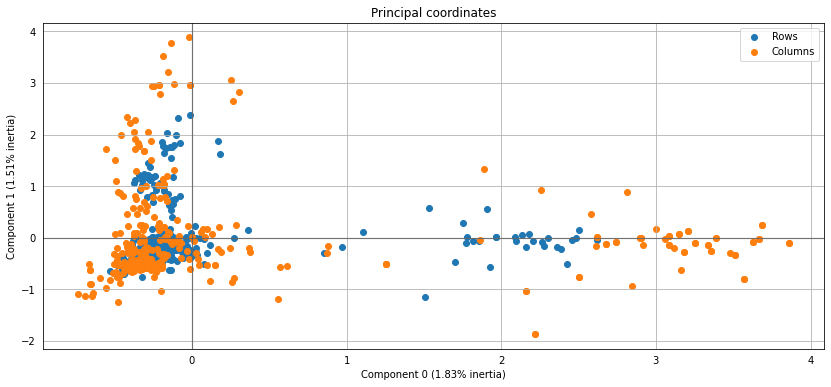

In [22]:
ca.plot_coordinates(
    X=category_,
    ax=None,
    figsize=(14,6),
    show_row_labels=False,
    show_col_labels=False,
)
plt.show()

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

In [24]:
famd = prince.FAMD()
famd.fit(df)
coordinates = famd.transform(df)

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.

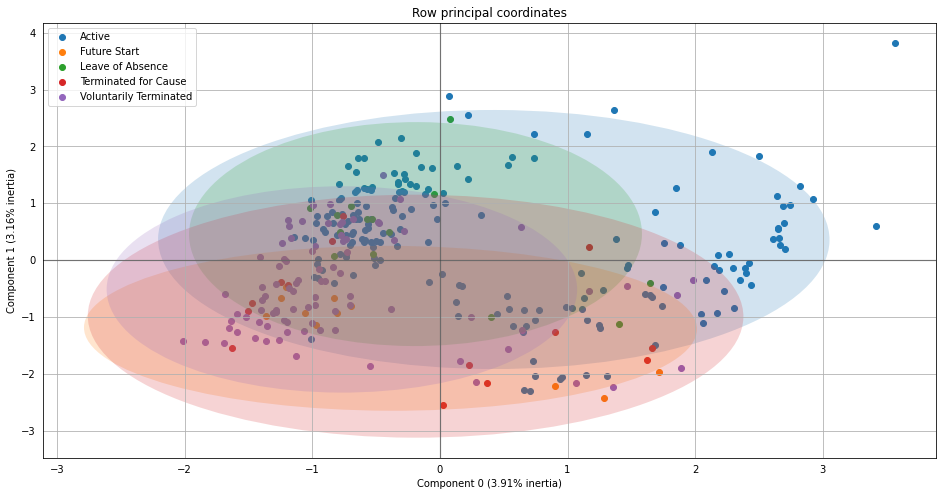

In [26]:
famd.plot_row_coordinates(
    df,
    color_labels=df['Employment Status'],
    ellipse_fill=True,
    figsize=(16, 8)
)
plt.show()
